In [148]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [149]:
import numpy as np

In [150]:
os.getcwd()

'C:\\Users\\Abhinav Gupta\\Downloads'

In [151]:
os.listdir('Intel Image Classifier')

['inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
 'seg_pred',
 'seg_test',
 'seg_train']

In [152]:
os.listdir('Intel Image Classifier/seg_test')

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [153]:
os.listdir('Intel Image Classifier/seg_test')

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [154]:
def len_data(filename):
    buildings_data = os.listdir(filename+'/buildings')
    forest_data = os.listdir(filename+'/forest')
    glacier_data = os.listdir(filename+'/glacier')
    mountain_data = os.listdir(filename+'/mountain')
    sea_data = os.listdir(filename+'/sea')
    street_data = os.listdir(filename+'/street')

    value = []
    for data in [buildings_data,forest_data,glacier_data,mountain_data,sea_data,street_data]:
        value.append(len(data))
        
    return sum(value)

In [155]:
filename = 'Intel Image Classifier/seg_train/'
print('Total Images in Training set : ' + str(len_data(filename)))

Total Images in Training set : 14034


In [157]:
filename = 'Intel Image Classifier/seg_test/'
print('Total Images in Testing set : ' + str(len_data(filename)))

Total Images in Testing set : 2995


In [158]:
def plot_data(filename):
    buildings_data = os.listdir(filename+'/buildings')
    forest_data = os.listdir(filename+'/forest')
    glacier_data = os.listdir(filename+'/glacier')
    mountain_data = os.listdir(filename+'/mountain')
    sea_data = os.listdir(filename+'/sea')
    street_data = os.listdir(filename+'/street')

    value = []
    for data in [buildings_data,forest_data,glacier_data,mountain_data,sea_data,street_data]:
        value.append(len(data))
    
    sns.barplot(['Buildings','Forest','Glacier','Mountain','Sea','Street'],value, palette = 'plasma')
    plt.title(filename.split('/')[1])



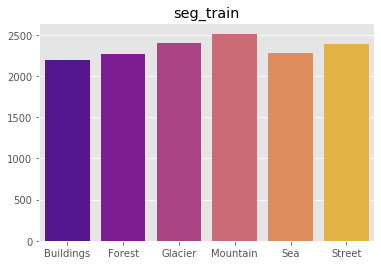

In [159]:
filename = 'Intel Image Classifier/seg_train/'
plot_data(filename)

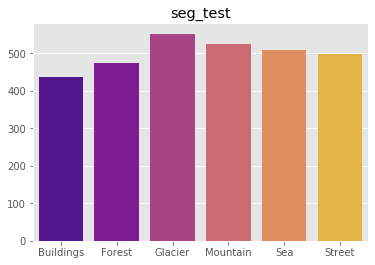

In [160]:
filename = 'Intel Image Classifier/seg_test/'
plot_data(filename)

In [161]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    
    folder1 = folder + '\\buildings'
    for filename in os.listdir(folder1)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder1,filename))
        if img is not None:
            images.append(img)
            
    folder2 = folder + '\\forest'
    for filename in os.listdir(folder2)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder2,filename))
        if img is not None:
            images.append(img)
    
    folder3 = folder + '\\glacier'
    for filename in os.listdir(folder3)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder3,filename))
        if img is not None:
            images.append(img)
            
    folder4 = folder + '\\mountain'
    for filename in os.listdir(folder4)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder4,filename))
        if img is not None:
            images.append(img)
            
    folder5 = folder + '\\sea'
    for filename in os.listdir(folder5)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder5,filename))
        if img is not None:
            images.append(img)
    
    folder6 = folder + '\\street'
    for filename in os.listdir(folder6)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder6,filename))
        if img is not None:
            images.append(img)
    return images

In [162]:
images = load_images_from_folder('Intel Image Classifier\\seg_train')

# Sample Images from training set

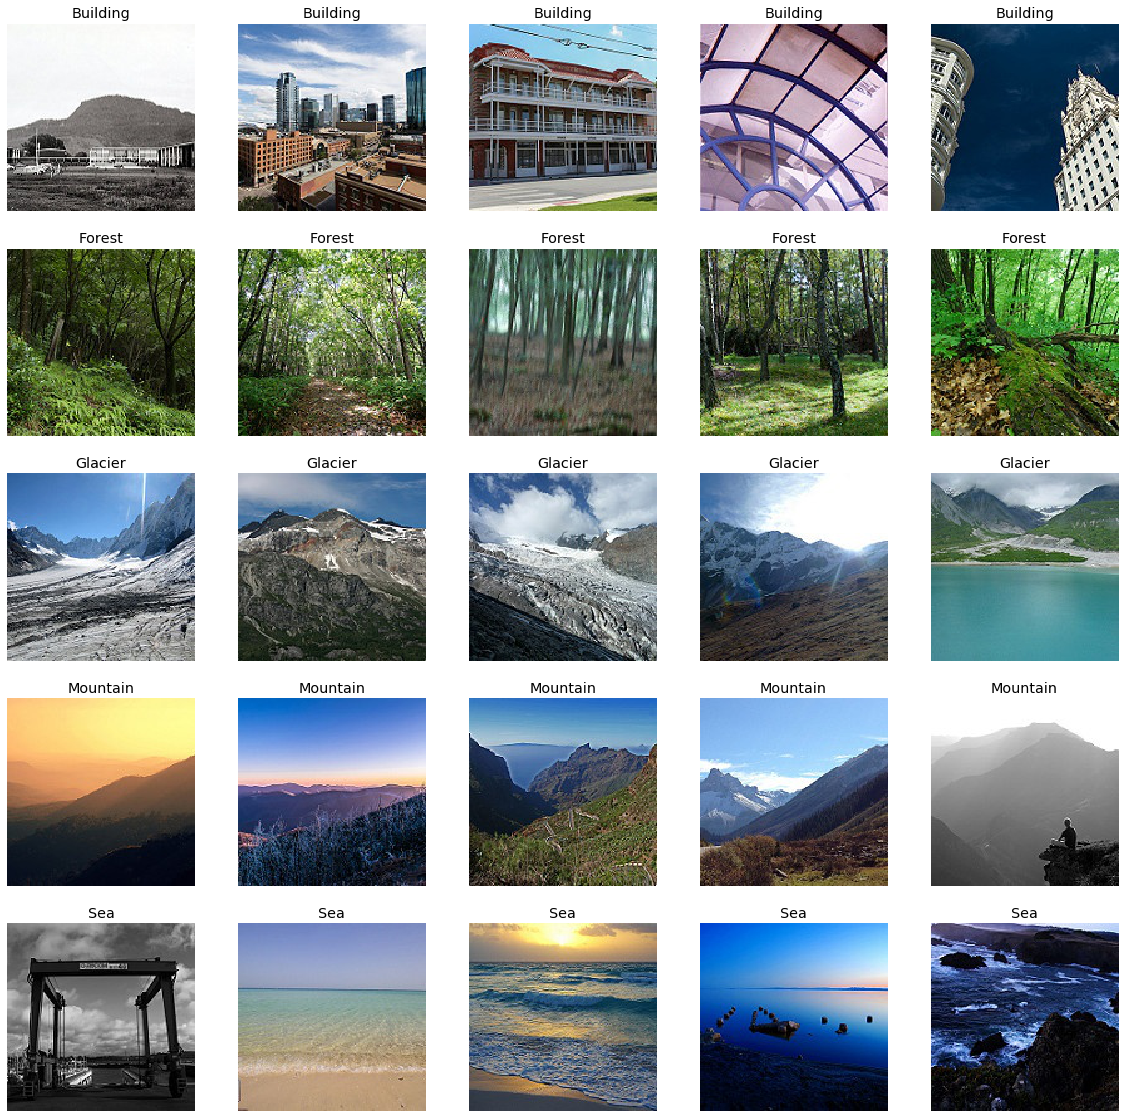

In [165]:
fig, axis = plt.subplots(5,5,figsize=(20,20))
count = 0
for i in range(0,5):
    for j in range(0,5):
        img_rgb = cv2.cvtColor(images[count], cv2.COLOR_BGR2RGB)
        axis[i,j].imshow(img_rgb)
        axis[i,j].axis('off')
        count = count + 1
        if i==0:
            axis[i,j].set_title('Building')
        elif i==1:
            axis[i,j].set_title('Forest')
        elif i==2:
            axis[i,j].set_title('Glacier')
        elif i==3:
            axis[i,j].set_title('Mountain')
        elif i==4:
            axis[i,j].set_title('Sea')
        else:
            axis[i,j].set_title('Street')


# 1st Model ( With Image Augmentation )

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [53]:
TRAINING_DIR = 'Intel Image Classifier/seg_train/'
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 14034 images belonging to 6 classes.


In [55]:
# No need to augment validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255
    ). 

In [56]:
VALIDATION_DIR = 'Intel Image Classifier/seg_test/'
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              class_mode='categorical',
                                                              target_size=(150, 150))

Found 3000 images belonging to 6 classes.


In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [42]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
439/439 [==============================] - 824s 2s/step - loss: 1.1284 - acc: 0.5529 - val_loss: 1.0396 - val_acc: 0.6127
Epoch 2/5
439/439 [==============================] - 650s 1s/step - loss: 0.9427 - acc: 0.6385 - val_loss: 0.8213 - val_acc: 0.7023
Epoch 3/5
439/439 [==============================] - 608s 1s/step - loss: 0.8435 - acc: 0.6806 - val_loss: 0.7707 - val_acc: 0.7210
Epoch 4/5
439/439 [==============================] - 536s 1s/step - loss: 0.7795 - acc: 0.7128 - val_loss: 0.7689 - val_acc: 0.7333
Epoch 5/5
439/439 [==============================] - 551s 1s/step - loss: 0.7493 - acc: 0.7269 - val_loss: 0.6294 - val_acc: 0.7800


# Transfer Learning


## 1) Inception V3

In [68]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [69]:
pre_trained_model = InceptionV3(input_shape=(150,150,3), include_top=False,weights=None)

In [70]:
weights_file = os.getcwd()+'\\Intel Image Classifier\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [71]:
pre_trained_model.load_weights(weights_file)

In [72]:
for layer in pre_trained_model.layers:  
    layer.trainable=False

In [73]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_103[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

### 1.1) Using 'mixed7' as last layer

In [74]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [75]:
from tensorflow.keras import layers
from tensorflow.keras import Model

x = layers.Flatten()(last_output)

x = layers.Dropout(0.2)(x)      

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense(6, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_103[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [76]:
history_inception = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
439/439 [==============================] - 1893s 4s/step - loss: 0.6556 - acc: 0.7718 - val_loss: 0.7572 - val_acc: 0.7720
Epoch 2/5
439/439 [==============================] - 1846s 4s/step - loss: 0.5021 - acc: 0.8156 - val_loss: 0.7052 - val_acc: 0.8113
Epoch 3/5
439/439 [==============================] - 1832s 4s/step - loss: 0.4656 - acc: 0.8298 - val_loss: 0.5895 - val_acc: 0.8217
Epoch 4/5
439/439 [==============================] - 1829s 4s/step - loss: 0.4453 - acc: 0.8348 - val_loss: 0.5159 - val_acc: 0.8410
Epoch 5/5
439/439 [==============================] - 1869s 4s/step - loss: 0.4255 - acc: 0.8415 - val_loss: 0.5008 - val_acc: 0.8507


 Validation Accuracy of **85.07%**

In [134]:
acc = history_inception.history['acc']
val_acc = history_inception.history['val_acc']   
loss = history_inception.history['loss']
val_loss = history_inception.history['val_loss']
epochs = history_inception.epoch

Text(0, 0.5, 'Accuracy')

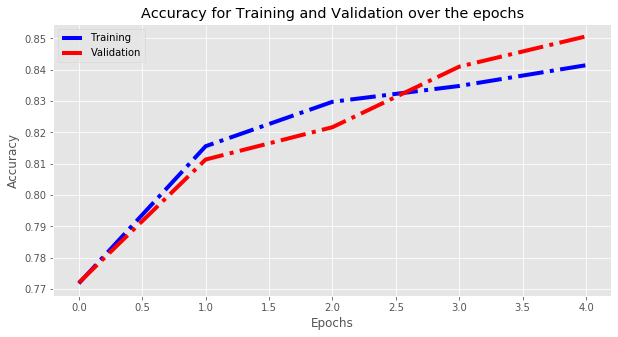

In [83]:
plt.figure(figsize=(10,5),frameon=False)
plt.plot(epochs,acc,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_acc,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Accuracy for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

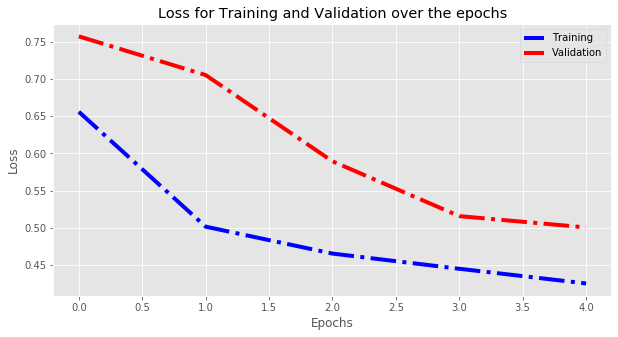

In [84]:
plt.figure(figsize=(10,5))
plt.plot(epochs,loss,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_loss,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Loss for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

### 1.1) Using 'mixed8' as last layer

In [61]:
last_layer = pre_trained_model.get_layer('mixed8')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 1280)


In [62]:
x = layers.Flatten()(last_output)

x = layers.Dropout(0.4)(x)      

x = layers.Dense(256, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense(6, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_9[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

Total params: 13,625,766
Trainable params: 2,950,918
Non-trainable params: 10,674,848
__________________________________________________________________________________________________


In [67]:
history1 = model.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)

439/439 [==============================] - 2893s 7s/step - loss: 0.6843 - acc: 0.7480 - val_loss: 0.6091 - val_acc: 0.7747


 Validation Accuracy of **77.47%**

## 2) ResNet50

In [117]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [118]:
pre_trained_model = ResNet50(input_shape=(150,150,3),include_top =False, weights= 'imagenet')

In [119]:
for layer in pre_trained_model.layers:  
    layer.trainable=False

In [120]:
pre_trained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [121]:
last_layer = pre_trained_model.get_layer('conv4_block6_out')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 10, 10, 1024)


In [122]:
x = layers.Flatten()(last_output)

x = layers.Dropout(0.4)(x)      

x = layers.Dense(256, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense(6, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

# Predicting Real images

We will use the **InceptionV3** model as it gave the best results(**85%**)

In [ ]:
history_inception.model.save('Final Model.h5')

In [ ]:
import cv2

model_pred = tf.keras.models.load_model('Final Model.h5')

In [112]:
model_pred.compile(loss='categorical_crossentropy',
             optimizer='adam',
                metrics=['accuracy'])

class_names = ['Building','Forest','Galcier','Mountain','Sea','Street']

In [136]:
def image_prediction(filename):
    img = cv2.imread(filename)
    imgPlot = img
    plt.imshow(imgPlot[...,::-1])
    plt.axis('off')
    img = cv2.resize(img,(150,150))
    img = np.reshape(img,[1,150,150,3])
    img = img.astype('float64')
    img = img / 255.0
    pred = model_pred.predict(img)
    name = class_names[np.argmax(pred)]
    plt.title('This is predicted as ' + name,size=20)

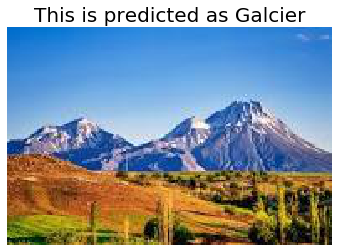

In [137]:
image_prediction('mountain.jpg')

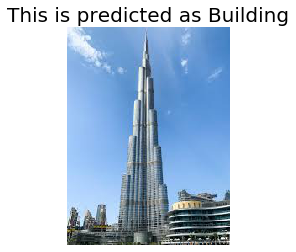

In [138]:
image_prediction('burj kahlifa.jpg')

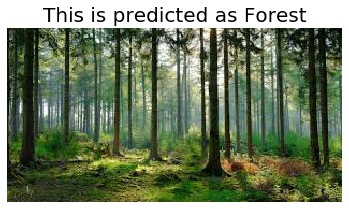

In [139]:
image_prediction('forest.jpg')

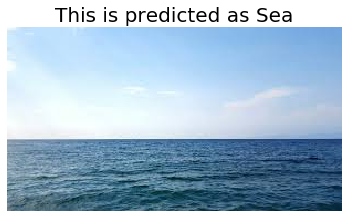

In [140]:
image_prediction('sea.jpg')

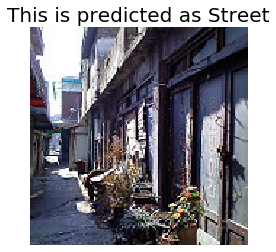

In [141]:
image_prediction('20152.jpg')

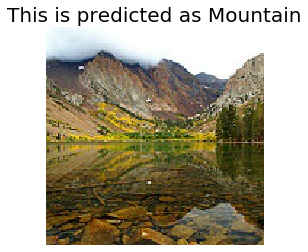

In [142]:
image_prediction('20438.jpg')

This is the image outside my house...


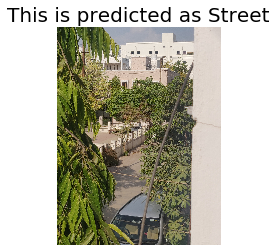

In [143]:
image_prediction('IMG_20200518_163037.jpg')
print("This is the image outside my house...")

It predicted **Right!**

### As you can see our model performs quite well for real world images